<a href="https://colab.research.google.com/github/atrinasalsabilnengkoda/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

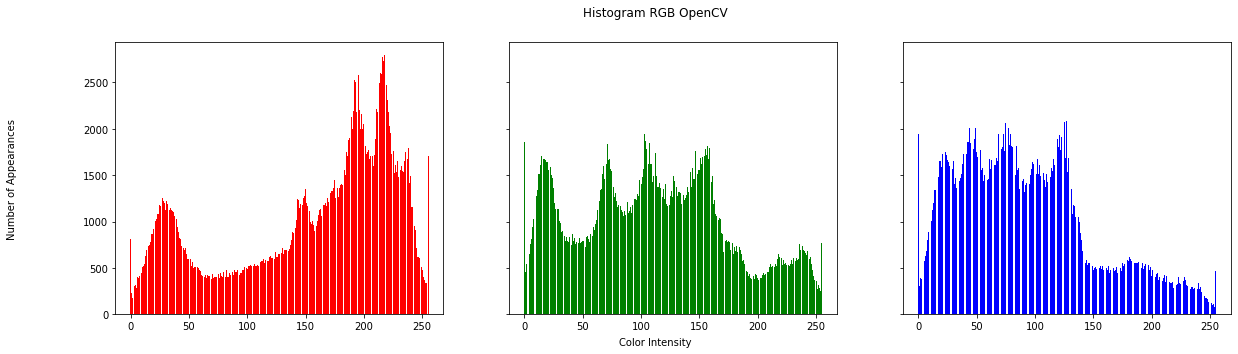

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

b = [0]*256
g = [0]*256
r = [0]*256

for y in range(0,height):
  for x in range(0,width):
    b[img[y][x][0]] += 1
    g[img[y][x][1]] += 1
    r[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB OpenCV')
fig.text(0.05, 0.5, 'Number of Appearances', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Color Intensity', ha='center')
axs[0].bar(names, r, color='red')
axs[1].bar(names, g, color='green')
axs[2].bar(names, b, color='blue')

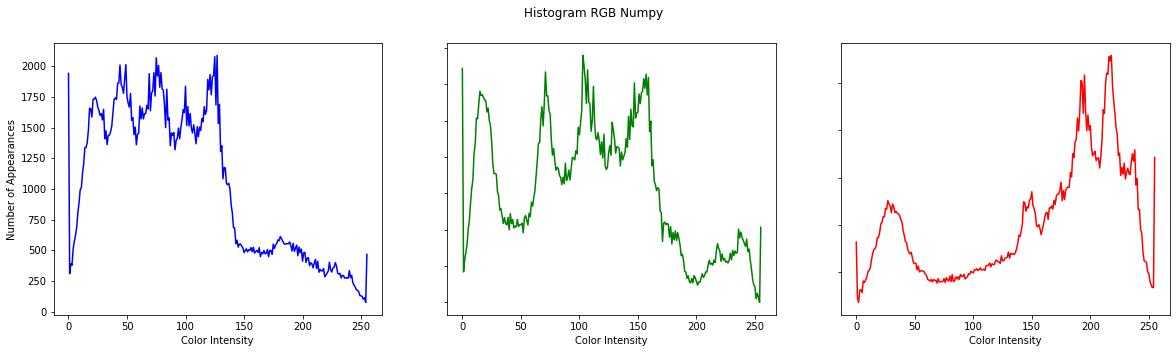

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/lena.jpg')
fig, axs = plt.subplots(1, 3, figsize=[20,5])
fig.suptitle('Histogram RGB Numpy')
color = ('b', 'g', 'r')
cl = 0

for i, col in enumerate(color):
    histogram, bin_edges = np.histogram(
        img[:, :, i], bins=256, range=(0, 256)
    )
    axs[cl].plot(bin_edges[0:-1], histogram, color=col)
    cl += 1
for ax in axs.flat:
    ax.set(xlabel='Color Intensity', ylabel='Number of Appearances')
for ax in axs.flat:
    ax.label_outer()

plt.show()

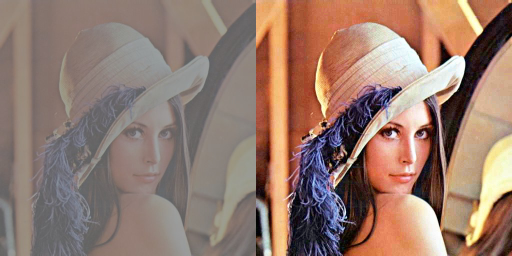

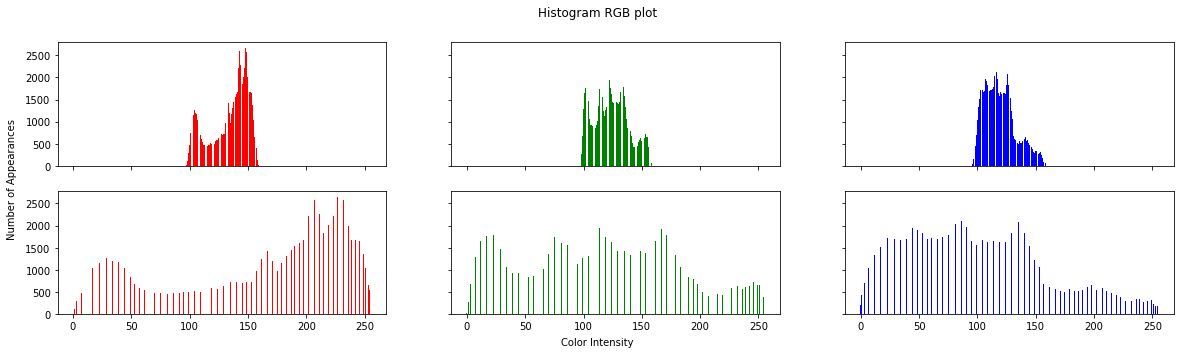

In [26]:
images = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/lena_lc.jpg')
images = cv.resize(images, (0,0), fx=0.5, fy=0.5)
def histogram(images):
  height, width, depth = np.shape(images) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][images[y][x][0]] += 1 
      ax[1][images[y][x][1]] += 1
      ax[2][images[y][x][2]] += 1 
  return ax

histogram_real = histogram(images)
images_array = np.asarray(images)
histogram_array = np.bincount(images_array.flatten(), minlength=256)
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

images_list = list(images_array.flatten())
equalize_images_list = [transform_map[p] for p in images_list]

equalize_images_array = np.reshape(np.asarray(equalize_images_list), images_array.shape) 
images2 = equalize_images_array
equalize_histogram = histogram(images2)
final_frame = cv.hconcat((images, images2))
cv2_imshow(final_frame)
names = np.arange (256) 
isgrayimg = np.array_equal(b, g, r) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Color Intensity', ha='center') 
  axs[0,0].bar(names, histogram_real[2], color='red') 
  axs[0,1].bar(names, histogram_real[1], color='green') 
  axs[0,2].bar(names, histogram_real[0], color='blue') 
  axs[1,0].bar(names, equalize_histogram[2], color='red') 
  axs[1,1].bar(names, equalize_histogram[1], color='green')
  axs[1,2].bar(names, equalize_histogram[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Color Intensity', ha='center') 
  axs[0,0].bar(names, histogram_real[2], color='gray') 
  axs[0,1].bar(names, equalize_histogram[2], color='gray')

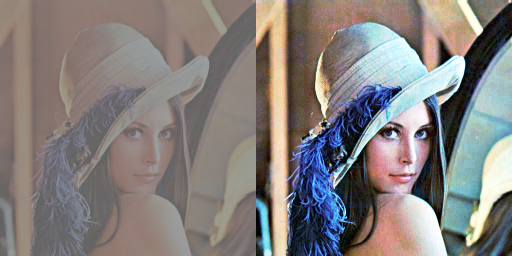

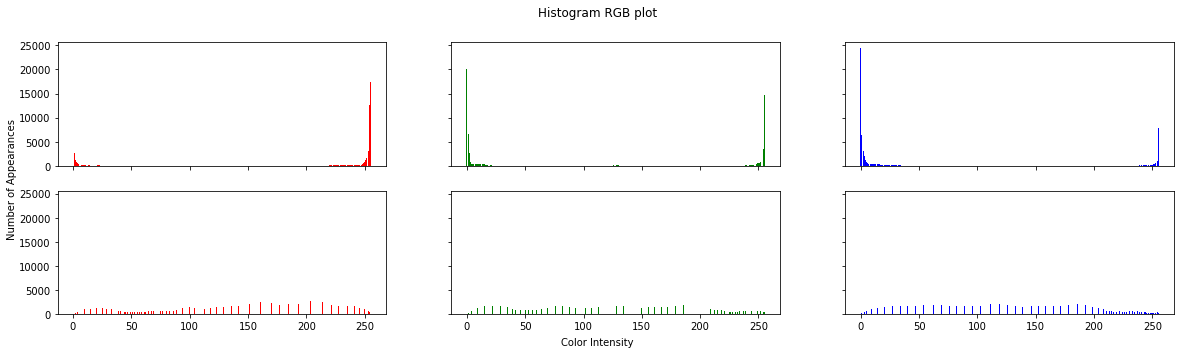

In [64]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/lena_lc.jpg')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
channels = cv.split(image)
equalize_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  equalize_channels.append(cv.equalizeHist(ch))
equalize_image = cv.merge(equalize_channels)
equalize_histogram = histogram(equalize_image)

final_frame = cv.hconcat((image, equalize_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(names, histogram_real[2], color='red')
  axs[0,1].bar(names, histogram_real[1], color='green')
  axs[0,2].bar(names, histogram_real[0], color='blue')
  axs[1,0].bar(names, equalize_histogram[2], color='red')
  axs[1,1].bar(names, equalize_histogram[1], color='green')
  axs[1,2].bar(names, equalize_histogram[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(names, histogram_real[2], color='gray')
  axs[0,1].bar(names, equalize_histogram[2], color='gray')

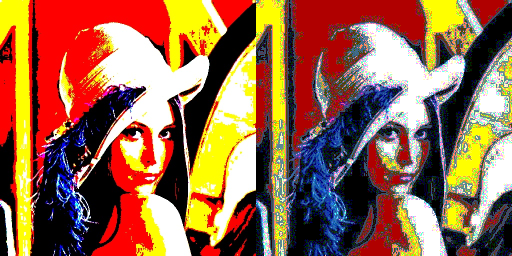

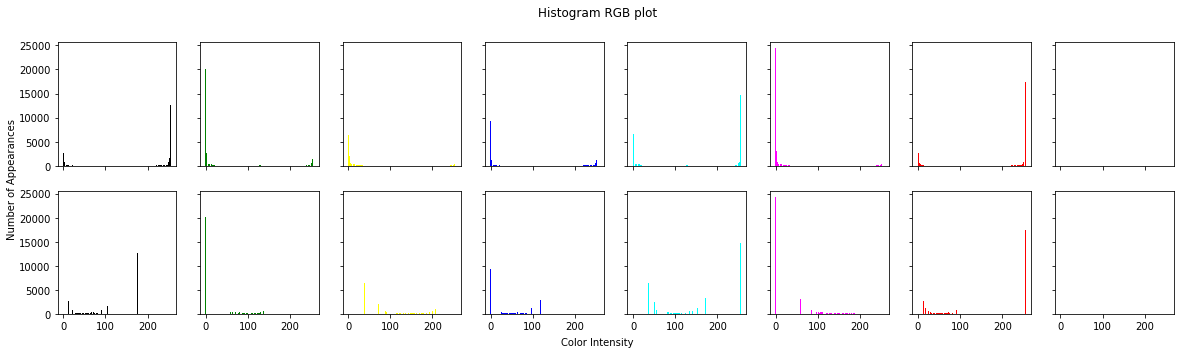

In [65]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/testlena.jpg')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
channels = cv.split(image)
equalize_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  equalize_channels.append(cv.equalizeHist(ch))
equalize_image = cv.merge(equalize_channels)
equalize_histogram = histogram(equalize_image)

final_frame = cv.hconcat((image, equalize_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 8, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(names, histogram_real[2], color='black')
  axs[0,1].bar(names, histogram_real[1], color='green')
  axs[0,2].bar(names, histogram_real[0], color='yellow')
  axs[0,3].bar(names, histogram_real[2], color='blue')
  axs[0,4].bar(names, histogram_real[1], color='cyan')
  axs[0,5].bar(names, histogram_real[0], color='magenta')
  axs[0,6].bar(names, histogram_real[2], color='red')
  axs[0,7].bar(names, histogram_real[1], color='white')
  axs[1,0].bar(names, equalize_histogram[2], color='black')
  axs[1,1].bar(names, equalize_histogram[1], color='green')
  axs[1,2].bar(names, equalize_histogram[0], color='yellow')
  axs[1,3].bar(names, equalize_histogram[2], color='blue')
  axs[1,4].bar(names, equalize_histogram[1], color='cyan')
  axs[1,5].bar(names, equalize_histogram[0], color='magenta')
  axs[1,6].bar(names, equalize_histogram[2], color='red')
  axs[1,7].bar(names, equalize_histogram[1], color='white')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(names, histogram_real[2], color='gray')
  axs[0,1].bar(names, equalize_histogram[2], color='gray')

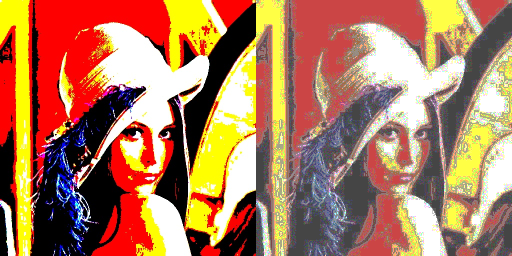

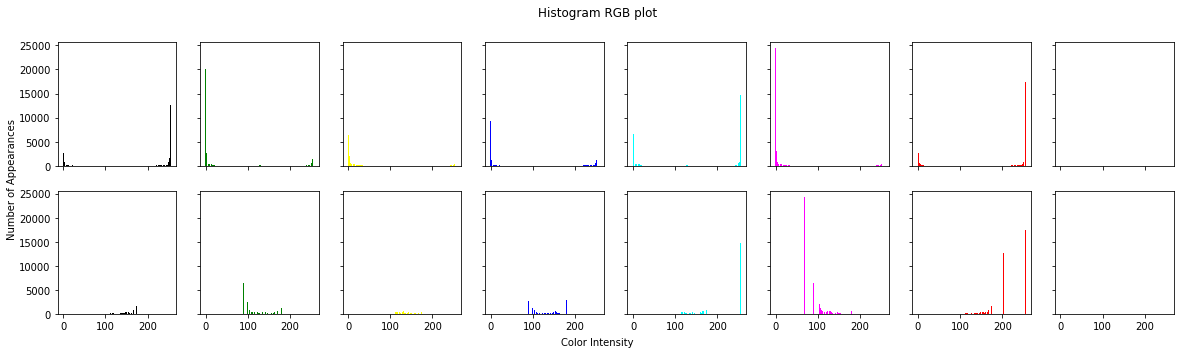

In [67]:
images = cv.imread('/content/drive/MyDrive/PCVK/Images/Images/testlena.jpg')
images = cv.resize(images, (0,0), fx=0.5, fy=0.5)
def histogram(images):
  height, width, depth = np.shape(images) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][images[y][x][0]] += 1 
      ax[1][images[y][x][1]] += 1
      ax[2][images[y][x][2]] += 1 
  return ax

histogram_real = histogram(images)
images_array = np.asarray(images)
histogram_array = np.bincount(images_array.flatten(), minlength=256)
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

images_list = list(images_array.flatten())
equalize_images_list = [transform_map[p] for p in images_list]

equalize_images_array = np.reshape(np.asarray(equalize_images_list), images_array.shape) 
images2 = equalize_images_array
equalize_histogram = histogram(images2)
final_frame = cv.hconcat((images, images2))
cv2_imshow(final_frame)
names = np.arange (256) 
isgrayimg = np.array_equal(b, g, r) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 8, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Color Intensity', ha='center') 
  axs[0,0].bar(names, histogram_real[2], color='black')
  axs[0,1].bar(names, histogram_real[1], color='green')
  axs[0,2].bar(names, histogram_real[0], color='yellow')
  axs[0,3].bar(names, histogram_real[2], color='blue')
  axs[0,4].bar(names, histogram_real[1], color='cyan')
  axs[0,5].bar(names, histogram_real[0], color='magenta')
  axs[0,6].bar(names, histogram_real[2], color='red')
  axs[0,7].bar(names, histogram_real[1], color='white')
  axs[1,0].bar(names, equalize_histogram[2], color='black')
  axs[1,1].bar(names, equalize_histogram[1], color='green')
  axs[1,2].bar(names, equalize_histogram[0], color='yellow')
  axs[1,3].bar(names, equalize_histogram[2], color='blue')
  axs[1,4].bar(names, equalize_histogram[1], color='cyan')
  axs[1,5].bar(names, equalize_histogram[0], color='magenta')
  axs[1,6].bar(names, equalize_histogram[2], color='red')
  axs[1,7].bar(names, equalize_histogram[1], color='white')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Number of Appearances', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Color Intensity', ha='center') 
  axs[0,0].bar(names, histogram_real[2], color='gray') 
  axs[0,1].bar(names, equalize_histogram[2], color='gray')

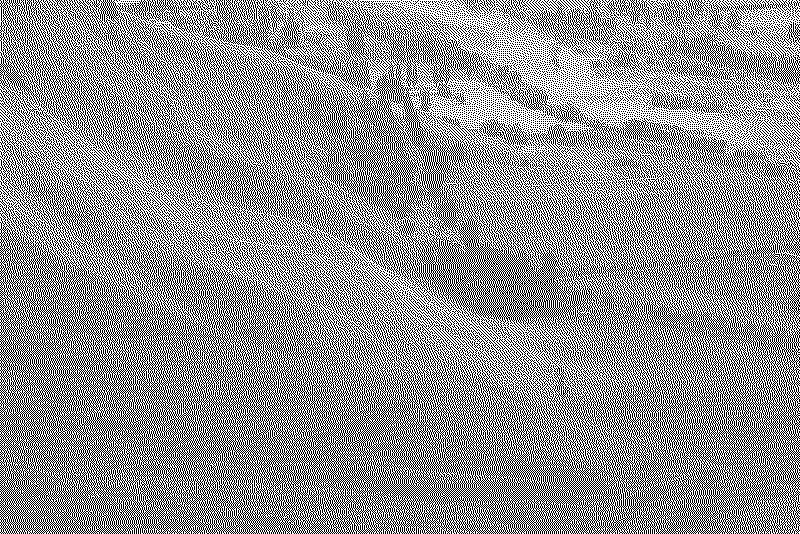

In [51]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Images/wiki.jpg')
GrayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK/Images/Images/wiki.jpg', GrayImage)
Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value
        
        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv2_imshow(GrayImage)